This will show a simple analysis of the mturk results

In [1]:
INPUT_MTURK_FILE = 'batch_results.csv'


#----------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.precision = 3
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100
plt.style.use('classic')

#----------------------------------------
URL = 'Input.image_url'
QUEST_COLS = ['Answer.Gender', 'Answer.Rating', 'Answer.Test','Answer.RaterGender']
ALL_COLS = [URL] + QUEST_COLS + ['True.Gender', 'WorkerId']

FAST_DICT =  {0: 'Very Masculine',
              1: 'Masculine',
              2: 'Somewhat Masculine',
              3: 'Neutral',
              4: 'Somewhat Feminine',
              5: 'Feminine',
              6: 'Very Feminine'}
#----------------------------------------

# extract the true gender from filename
def extract_gender(fname: str):
    """Extracts the third character in which 0 = M, 1 = F """
    split = fname.split('_')
    gender = int(split[1])
    #gender = 'Male' if split[1]==0 else 'Female'
    return gender


# load data into pandas DataFrame (this make take a while)
df = pd.read_csv(INPUT_MTURK_FILE)
df['True.Gender'] = df[URL].apply(extract_gender)
df = df[ALL_COLS].dropna()
df['Answer.Gender'] = df['Answer.Gender'].apply(lambda x: 0 if x == 'Male' else 1)
df['Answer.RaterGender'] = df['Answer.RaterGender'].apply(lambda x: 0 if x == 'Male' else 1)

print('data loaded')
print('shape: ', df.shape)
df_all = df.copy()


data loaded
shape:  (4776, 7)


In [2]:
# remove bad workers
# if the worker did not give consistent results on their own gender
df_worker_mean = df_all.groupby('WorkerId').mean().reset_index()
good_workers = df_worker_mean[(df_worker_mean['Answer.RaterGender'] == 1) | \
                             (df_worker_mean['Answer.RaterGender'] == 0)]['WorkerId']
#print('shape', good_workers.shape)
good_worker_set = set(good_workers)
#print(good_worker_set)
df = df[df['WorkerId'].apply(lambda x: x in good_worker_set)]
#display(good_workers)
print('df new shape', df.shape)


df new shape (3453, 7)


In [3]:
# LOOK at MEANS

#print(df.columns)

# group by image
g = df[ALL_COLS].groupby(URL)

# find the average among all the raters for each image
df_mean = g.mean()
# put index into a column
df_mean.reset_index(level=0, inplace=True) 

display(df_mean)

,Input.image_url,Answer.Gender,Answer.Rating,Answer.RaterGender,True.Gender
0,http://snapdocket.com/fast2/18_0_0_20170110232054251.jpg.chip.jpg,0.000,1.200,0.600,0.0
1,http://snapdocket.com/fast2/18_0_0_20170110232121048.jpg.chip.jpg,0.000,1.600,0.400,0.0
2,http://snapdocket.com/fast2/18_0_0_20170110232624418.jpg.chip.jpg,0.000,3.000,0.667,0.0
3,http://snapdocket.com/fast2/18_0_0_20170117140132816.jpg.chip.jpg,0.000,1.500,0.500,0.0
4,http://snapdocket.com/fast2/18_0_1_20170113132626633.jpg.chip.jpg,0.000,0.750,0.250,0.0
5,http://snapdocket.com/fast2/18_1_0_20170109213130477.jpg.chip.jpg,1.000,5.250,0.500,1.0
6,http://snapdocket.com/fast2/18_1_0_20170109213550274.jpg.chip.jpg,1.000,3.000,0.333,1.0
7,http://snapdocket.com/fast2/18_1_0_20170109214120554.jpg.chip.jpg,1.000,5.000,0.250,1.0
8,http://snapdocket.com/fast2/18_1_0_20170117140340105.jpg.chip.jpg,1.000,5.000,0.500,1.0
9,http://snapdocket.com/fast2/18_1_0_20170117140440920.jpg.chip.jpg,1.000,5.750,0.250,1.0


In [4]:
# LOOK AT MAX AND MINS
maxval = df_mean['Answer.Rating'].max()
minval = df_mean['Answer.Rating'].min()
print('max', maxval)
print('min', minval)

print('\nMAXS')
print(df_mean[df_mean['Answer.Rating'] == maxval][URL])

print('\nMIN')
print(df_mean[df_mean['Answer.Rating'] == minval][URL])

#display(g.mean())

#display(df[ALL_COLS])

max 6.0
min 0.0

MAXS
33     http://snapdocket.com/fast2/20_1_0_20170117133854316.jpg.chip.jpg
47     http://snapdocket.com/fast2/20_1_4_20170103223123528.jpg.chip.jpg
74     http://snapdocket.com/fast2/22_1_0_20170116220938702.jpg.chip.jpg
75     http://snapdocket.com/fast2/22_1_0_20170117133125316.jpg.chip.jpg
88     http://snapdocket.com/fast2/22_1_3_20170119153416689.jpg.chip.jpg
100    http://snapdocket.com/fast2/23_1_0_20170103180035647.jpg.chip.jpg
108    http://snapdocket.com/fast2/23_1_2_20170116172814255.jpg.chip.jpg
152    http://snapdocket.com/fast2/24_1_2_20170116165631297.jpg.chip.jpg
162    http://snapdocket.com/fast2/24_1_3_20170117150411539.jpg.chip.jpg
198    http://snapdocket.com/fast2/25_1_0_20170116165420657.jpg.chip.jpg
200    http://snapdocket.com/fast2/25_1_0_20170116211917463.jpg.chip.jpg
208    http://snapdocket.com/fast2/25_1_1_20170117195334509.jpg.chip.jpg
278    http://snapdocket.com/fast2/26_1_0_20170109134235854.jpg.chip.jpg
295    http://snapdocket.com/

In [5]:
# TODO: LOOK at MAXS and MINS for each real gender

df_mean['True.Gender.str'] = df_mean['True.Gender'].apply(lambda x: 'Male' if x==0 else 'Female')
g_mf = df_mean.groupby('True.Gender.str')

maxval = g_mf['Answer.Rating'].max()
minval = g_mf['Answer.Rating'].min()
print('Max', maxval)
print('\nMin', minval)

for gender, grp in g_mf:
    print('------------------------------------------------------')
    print(gender)
    print('\nMost feminine: value =', maxval[gender])
    print(grp[grp['Answer.Rating'] == maxval[gender]][URL])

    print('\nMost masculine: value =', minval[gender])
    print(grp[grp['Answer.Rating'] == minval[gender]][URL])



Max True.Gender.str
Female    6.0
Male      6.0
Name: Answer.Rating, dtype: float64

Min True.Gender.str
Female    0.75
Male      0.00
Name: Answer.Rating, dtype: float64
------------------------------------------------------
Female

Most feminine: value = 6.0
33     http://snapdocket.com/fast2/20_1_0_20170117133854316.jpg.chip.jpg
47     http://snapdocket.com/fast2/20_1_4_20170103223123528.jpg.chip.jpg
74     http://snapdocket.com/fast2/22_1_0_20170116220938702.jpg.chip.jpg
75     http://snapdocket.com/fast2/22_1_0_20170117133125316.jpg.chip.jpg
88     http://snapdocket.com/fast2/22_1_3_20170119153416689.jpg.chip.jpg
100    http://snapdocket.com/fast2/23_1_0_20170103180035647.jpg.chip.jpg
108    http://snapdocket.com/fast2/23_1_2_20170116172814255.jpg.chip.jpg
152    http://snapdocket.com/fast2/24_1_2_20170116165631297.jpg.chip.jpg
162    http://snapdocket.com/fast2/24_1_3_20170117150411539.jpg.chip.jpg
198    http://snapdocket.com/fast2/25_1_0_20170116165420657.jpg.chip.jpg
200    ht

Male FAST scores


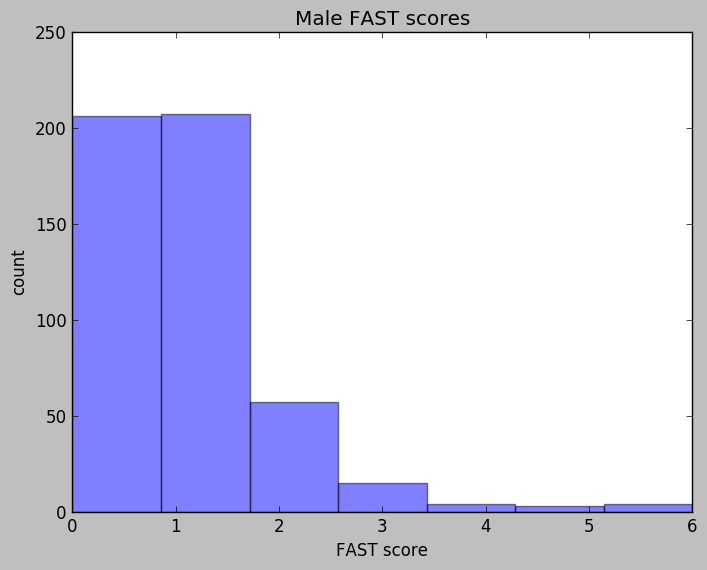

Female FAST scores


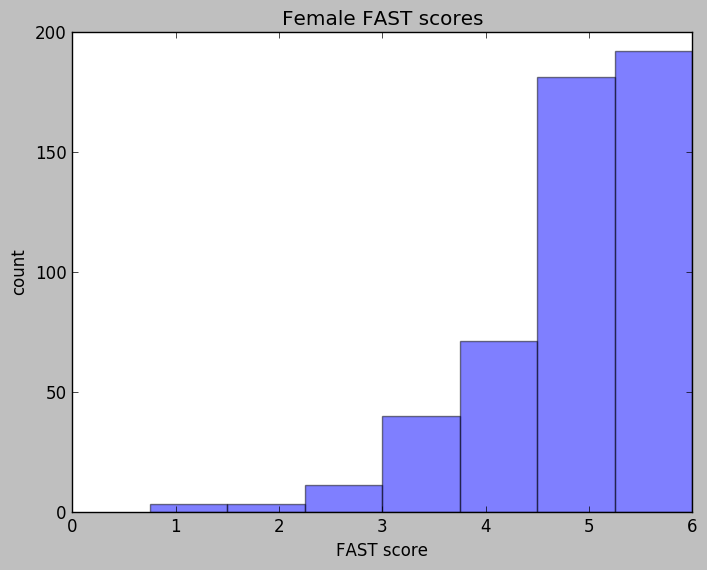

In [6]:
# HISTOGRAM OF FAST SCORES BY GENDER

import matplotlib.pyplot as plt
 
num_bins = 7
df_f= df_mean.loc[df_mean['True.Gender'] == 0]
#display(df_f)
print("Male FAST scores")
n, bins, patches = plt.hist(df_f['Answer.Rating'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel("FAST score")
plt.ylabel("count")
plt.title("Male FAST scores")
plt.show()

df_m= df_mean.loc[df_mean['True.Gender'] == 1]
print("Female FAST scores")
n, bins, patches = plt.hist(df_m['Answer.Rating'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel("FAST score")
plt.ylabel("count")
plt.title("Female FAST scores")
plt.show()

In [7]:
# Export df means to csv file

import csv
df_copy = df_mean
# print(df_copy['Input.image_url'].str[28:])
df_new = pd.DataFrame(columns = ["Image_filename"])
df_new["Image_filename"] = df_copy['Input.image_url'].str[28:-4]
#df_copy['Input.image_url'] = df_copy['Input.image_url'].str[28:]
df_new = pd.concat([df_new, df_copy], axis=1)
display(df_new)
df_new.to_csv("clean_results.csv")

,Image_filename,Input.image_url,Answer.Gender,Answer.Rating,Answer.RaterGender,True.Gender,True.Gender.str
0,18_0_0_20170110232054251.jpg.chip,http://snapdocket.com/fast2/18_0_0_20170110232054251.jpg.chip.jpg,0.000,1.200,0.600,0.0,Male
1,18_0_0_20170110232121048.jpg.chip,http://snapdocket.com/fast2/18_0_0_20170110232121048.jpg.chip.jpg,0.000,1.600,0.400,0.0,Male
2,18_0_0_20170110232624418.jpg.chip,http://snapdocket.com/fast2/18_0_0_20170110232624418.jpg.chip.jpg,0.000,3.000,0.667,0.0,Male
3,18_0_0_20170117140132816.jpg.chip,http://snapdocket.com/fast2/18_0_0_20170117140132816.jpg.chip.jpg,0.000,1.500,0.500,0.0,Male
4,18_0_1_20170113132626633.jpg.chip,http://snapdocket.com/fast2/18_0_1_20170113132626633.jpg.chip.jpg,0.000,0.750,0.250,0.0,Male
5,18_1_0_20170109213130477.jpg.chip,http://snapdocket.com/fast2/18_1_0_20170109213130477.jpg.chip.jpg,1.000,5.250,0.500,1.0,Female
6,18_1_0_20170109213550274.jpg.chip,http://snapdocket.com/fast2/18_1_0_20170109213550274.jpg.chip.jpg,1.000,3.000,0.333,1.0,Female
7,18_1_0_20170109214120554.jpg.chip,http://snapdocket.com/fast2/18_1_0_20170109214120554.jpg.chip.jpg,1.000,5.000,0.250,1.0,Female
8,18_1_0_20170117140340105.jpg.chip,http://snapdocket.com/fast2/18_1_0_20170117140340105.jpg.chip.jpg,1.000,5.000,0.500,1.0,Female
9,18_1_0_20170117140440920.jpg.chip,http://snapdocket.com/fast2/18_1_0_20170117140440920.jpg.chip.jpg,1.000,5.750,0.250,1.0,Female


In [8]:
df['WorkerId'].nunique()

200